# BigCodeBench Dataset

https://github.com/bigcode-project/bigcodebench

In [1]:
import json
import numpy as np
import torch
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split

import os 
import sys

sys.path.append(os.path.join(os.getcwd(), "../../"))

import src.visualization.plot_rawdata as plotutils

In [2]:
from datasets import load_dataset

dataset = load_dataset("bigcode/bigcodebench")
sum([len(dataset[elem]) for elem in dataset.keys()])

README.md:   0%|          | 0.00/8.83k [00:00<?, ?B/s]

Generating v0.1.0_hf split:   0%|          | 0/1140 [00:00<?, ? examples/s]

Generating v0.1.1 split:   0%|          | 0/1140 [00:00<?, ? examples/s]

Generating v0.1.2 split:   0%|          | 0/1140 [00:00<?, ? examples/s]

Generating v0.1.3 split:   0%|          | 0/1140 [00:00<?, ? examples/s]

Generating v0.1.4 split:   0%|          | 0/1140 [00:00<?, ? examples/s]

5700

In [3]:
dataset.keys()

dict_keys(['v0.1.0_hf', 'v0.1.1', 'v0.1.2', 'v0.1.3', 'v0.1.4'])

In [4]:
type(dataset['v0.1.4'])

datasets.arrow_dataset.Dataset

In [11]:
idx = 222
dataset['v0.1.4'][idx]

{'task_id': 'BigCodeBench/222',
 'complete_prompt': 'import math\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n\ndef task_func(list_input):\n    """\n    Sort the given list in ascending order based on the degree value of its elements, calculate the cumulative sum of \n    the sorted list, and draw a line chart of the cumulative sum.\n\n    Parameters:\n    list_input (list): The list to be sorted.\n\n    Returns:\n    tuple: A tuple containing:\n           - numpy array: The cumulative sum of the sorted list.\n           - matplotlib.axes._axes.Axes: The Axes object of the plotted line chart.\n\n    Requirements:\n    - math\n    - numpy\n    - matplotlib.pyplot\n\n    Example:\n    >>> cumsum, ax = task_func([10, 20, 30])\n    >>> print(cumsum)\n    [10 30 60]\n    >>> ax.get_title()\n    \'Cumulative Sum Plot\'\n    """\n',
 'instruct_prompt': 'Sort the given list in ascending order based on the degree value of its elements, calculate the cumulative sum of the sorted list,

In [12]:
dataset['v0.1.4'][idx].keys()

dict_keys(['task_id', 'complete_prompt', 'instruct_prompt', 'canonical_solution', 'code_prompt', 'test', 'entry_point', 'doc_struct', 'libs'])

In [13]:
print(f"The 'v0.1.4' subset has {len(dataset['v0.1.4'])} samples")

The 'v0.1.4' subset has 1140 samples


In [14]:
data = dataset['v0.1.4']

In [15]:
type(data)

datasets.arrow_dataset.Dataset

In [16]:
len(data)

1140

#### Check if all elements in data are of type dict and if just one input prompt per data sample (no conversation)

In [17]:
verbose= False

keys = ['task_id', 'complete_prompt', 'instruct_prompt', 'canonical_solution', 'code_prompt', 'test', 'entry_point', 'doc_struct', 'libs']

for i, elem in enumerate(data):
    if not isinstance(elem, dict):
        print(f"Elem is not a dict! {elem}")
    elif sorted(list(elem.keys())) != sorted(keys):
        print(f"Elem has different keys in dict! {elem.keys()}\n{elem}\n")

### No data

In [18]:
no_conver_data = []

prompt_key = "instruct_prompt"

for elem in data: 
    if not elem[prompt_key]:
        no_conver_data.append(elem)
print(f"There are {len(no_conver_data)} elements in the dataset with no prompts!")

There are 0 elements in the dataset with no prompts!


So all of the elements in this dataset have an instruction!

#### Plot conversations lengths (number of tokens of first human input)

In [19]:
access_tk = os.getenv("HF_API_TOKEN")
device_str = "cuda:0"
model_name = "meta-llama/Llama-3.2-3B-Instruct"
padding_side='left'

tokenizer = AutoTokenizer.from_pretrained(model_name, token=access_tk, device_map=device_str, torch_dtype=torch.float16, padding_side=padding_side)



## Input handling
Each sample in the dataset is of type `dict`.
The keys of that `dict` are `['task_id', 'complete_prompt', 'instruct_prompt', 'canonical_solution', 'code_prompt', 'test', 'entry_point', 'doc_struct', 'libs']`. 

However, the tokenizers' `chat_templates` do not recognize those keyas, so we need to append it to the user's `content`.  

In [20]:
def get_tokens(sentence, tokenizer):
    return tokenizer.apply_chat_template(sentence, return_tensors="pt", add_generation_prompt=True)   

In [21]:
from src.data.rawdata_processor import bigcodebench_generate_rawprompt_text, build_rawprompt_text_chat, build_rawprompt_text_batch

In [22]:
mystring = bigcodebench_generate_rawprompt_text(data[idx], tokenizer, truncate=False)
print(mystring)

Sort the given list in ascending order based on the degree value of its elements, calculate the cumulative sum of the sorted list, and draw a line chart of the cumulative sum.
The function should output with:
    tuple: A tuple containing:
    numpy array: The cumulative sum of the sorted list.
    matplotlib.axes._axes.Axes: The Axes object of the plotted line chart.
You should write self-contained code starting with:
```
import math
import numpy as np
import matplotlib.pyplot as plt
def task_func(list_input):
```


In [23]:
build_rawprompt_text_chat(mystring)

[{'role': 'user',
  'content': 'Sort the given list in ascending order based on the degree value of its elements, calculate the cumulative sum of the sorted list, and draw a line chart of the cumulative sum.\nThe function should output with:\n    tuple: A tuple containing:\n    numpy array: The cumulative sum of the sorted list.\n    matplotlib.axes._axes.Axes: The Axes object of the plotted line chart.\nYou should write self-contained code starting with:\n```\nimport math\nimport numpy as np\nimport matplotlib.pyplot as plt\ndef task_func(list_input):\n```'}]

In [24]:
get_tokens(build_rawprompt_text_chat(mystring), tokenizer).shape

torch.Size([1, 144])

In [25]:
print(tokenizer.decode(get_tokens(build_rawprompt_text_batch(mystring, 5), tokenizer)[0]))

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 10 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Sort the given list in ascending order based on the degree value of its elements, calculate the cumulative sum of the sorted list, and draw a line chart of the cumulative sum.
The function should output with:
    tuple: A tuple containing:
    numpy array: The cumulative sum of the sorted list.
    matplotlib.axes._axes.Axes: The Axes object of the plotted line chart.
You should write self-contained code starting with:
```
import math
import numpy as np
import matplotlib.pyplot as plt
def task_func(list_input):
```<|eot_id|><|start_header_id|>assistant<|end_header_id|>




### Analyze lenght of prompts in terms of number of tokens

In [26]:
conv_len_tokens = [get_tokens(build_rawprompt_text_chat(bigcodebench_generate_rawprompt_text(elem, tokenizer, truncate=False)), 
                              tokenizer).shape[1] for elem in data]

In [28]:
len(conv_len_tokens)

1140

In [29]:
np.max(conv_len_tokens)

np.int64(1251)

In [30]:
print(f"MEAN: {np.mean(conv_len_tokens)}\nMIN: {np.min(conv_len_tokens)},\nMAX: {np.max(conv_len_tokens)}")
print(*[f"P{p}: {v:.2f}" for p, v in zip([25, 50, 75, 99], np.percentile(conv_len_tokens, [25, 50, 75, 99]))])

MEAN: 179.81842105263158
MIN: 87,
MAX: 1251
P25: 137.00 P50: 164.00 P75: 205.00 P99: 398.44


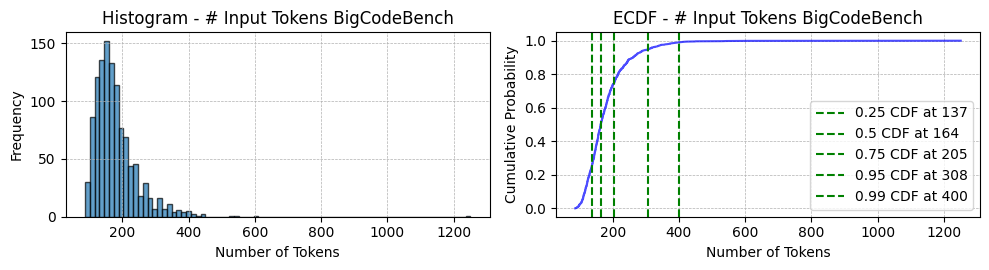

In [31]:
fig = plotutils.plot_histogram_and_cdf(conv_len_tokens, in_size=(10, 2.8), 
                             in_title="# Input Tokens BigCodeBench", x_forcdf=0, 
                                       cdf_forx=[0.25, 0.5, 0.75, 0.95, 0.99],
                                      n_bins=80)

In [32]:
fig.savefig("../../outputs/images/raw_data_BIGCODEBENCH_ntokens_hist.pdf", bbox_inches="tight")

# Split the datasets

In [25]:
SEED = 42
MAXIMUM = 2000

In [26]:
np.random.seed(SEED)

In [27]:
tmp = np.arange(len(data))
np.random.shuffle(tmp)

In [28]:
idx_subset = min(MAXIMUM, len(data))
tmp = tmp[0:idx_subset]
print(f"SELECTING {len(tmp)} samples randomly from dataset")

SELECTING 1140 samples randomly from dataset


In [29]:
train_indxs, val_indxs, test_indxs = np.split(tmp, [int(0.7*len(tmp)), int(0.9*len(tmp))])

In [30]:
print(f"Selecting {len(train_indxs)} training, {len(val_indxs)} validation, and {len(test_indxs)} test samples")

Selecting 798 training, 228 validation, and 114 test samples


In [31]:
data_train = [data[int(i)] for i in train_indxs]
data_val = [data[int(i)] for i in val_indxs]
data_test = [data[int(i)] for i in test_indxs]

In [32]:
# Check if the lengths agree
print(f"Percentage of training data: {round(len(data_train)/len(data), 4)}")
print(f"Percentage of validation data: {round(len(data_val)/len(data), 4)}")
print(f"Percentage of test data: {round(len(data_test)/len(data), 4)}")

Percentage of training data: 0.7
Percentage of validation data: 0.2
Percentage of test data: 0.1


## Save Datasets

In [33]:
def save_data(dataset, path):
    with open(path, 'w') as f:
        json.dump(dataset, f)
    print(f"Dataset saved to path {path}")

In [34]:
save_path_src = "../raw_instruct/BigCodeBench/raw_BigCodeBench"

In [35]:
save_data(data_train, save_path_src + "_train.json")

Dataset saved to path ../raw_instruct/BigCodeBench/raw_BigCodeBench_train.json


In [36]:
save_data(data_val, save_path_src + "_validate.json")

Dataset saved to path ../raw_instruct/BigCodeBench/raw_BigCodeBench_validate.json


In [37]:
save_data(data_test, save_path_src + "_test.json")

Dataset saved to path ../raw_instruct/BigCodeBench/raw_BigCodeBench_test.json
